### <font color="lightblue">***Datathon***

**¡Bienvenidos al Datathon de Henry! Durante esta semana estarán poniendo en práctica sus habilidades en el campo de la predicción. Deberán usar cierta métrica para medir la performance del modelo y que, a su vez, será usada para elegir los mejores modelos.**

### <font color="lightblue">***Descripción del problema***

**Somos parte de una empresa de logística que trabaja para un portal importante de E-Commerce, y nuestro Team Leader nos da la tarea de implementar un modelo que nos permita predecir si un envío llegará a tiempo o no, según la información contenida en el dataset puesto a disposición para poder prestar atención y mejor seguimiento a aquellos envíos que pueden llegar a dar problemas.**

### <font color="lightblue">***Metricas***

**Como método de evaluación del desempeño del modelo, se utilizará Exhaustividad (Recall) de la matriz de confusión (Confusion Matrix)**

$$ Recall=\frac{TP}{TP+FN}$$

**siendo $TP$ los verdaderos positivos, $TN$ verdaderos negativos y $FN$ los falsos negativos.**

### <font color="lightblue">***Archivos provistos***

**Se proveen los archivos:**
**- 'E-Commerce_train.xlsx', con 8999 observaciones y 12 dimensiones, incluyendo información sobre si el envío llegó a tiempo o no en el momento del registro.**
**- 'E-Commerce_test.xlsx', con 10998 observaciones y 11 dimensiones, sin incluir información sobre si el envío llegó a tiempo o no en el momento del registro.**

Nota: Se uso Lightblue en color de letras del Markdown para ver en Dark Mode (Aclaración por si no se ve bien en otro entorno)




### <font color="lightblue">***1. Análisis Exploratorio de datos***

<font color="lightblue">**Importamos las librerias necesarias e ingestamos los datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel("E-Commerce_train.xlsx")

<font color="lightblue">**Visión general del dataset**

In [3]:
train.sample(8) # Traemos datos aleatorios para ver como esta compuesto el Dataset

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
538,539,C,Road,3,3,207,6,high,F,24,3702,1
3709,3710,F,Flight,4,1,219,5,medium,M,5,5253,0
8477,8478,F,Road,5,1,268,3,medium,F,5,5663,0
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
4193,4194,F,Ship,5,2,233,3,low,F,5,5756,1
3400,3401,C,Road,4,2,197,3,low,F,2,5707,0
6837,6838,B,Road,3,3,250,6,medium,M,9,5322,1
8316,8317,D,Ship,6,5,263,4,low,M,10,1669,0


In [4]:
train.head()  # Vemos las primeras filas

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
train.shape # La cantidad de filas y columnas

(8999, 12)

In [6]:
train.columns # Vemos el nombre de cada columna

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [7]:
train.dtypes # Analizamos los tipos de datos que hay en cada columna

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [8]:
train.info() # Vemos una información general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [9]:
train.describe() # Realizamos una vista estadistica de los registros de tipo númerico

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


<font color="lightblue">**Descripcion de las dimensiones**
<font color="white">
- ID: identificador del registro de orden (valor entero).
- Warehouse_block: Almacén de distribución de donde salió la orden (A a F).
- Mode_of_Shipment: Medio de transporte (Flight, Road, Ship).
- Customer_care_calls: Número de llamadas a atención al cliente que hubo por esa orden. (valores enteros del 2 al 7)
- Customer_rating: Puntaje del cliente (valores enteros 1 al 5).
- Cost_of_the_Product: Costo del producto (valor numérico entero de 96 a 310).
- Prior_purchases: Número de compras previas realizadas por el cliente (valor numérico entero de 2 a 10).
- Product_importance: Nivel de importancia del producto (low, medium, high).
- Gender: Género del comprador (F, M).
- Discount_offered: Porcentaje de descuento ofrecido por esa compra (valor numérico entero de 1 a 65):
- Weight_in_gms: Peso del paquete de la orden, en gramos (valor numérico entero de 1001 a 7846).
- Reached.on.Time_Y.N: Información sobre la llegada del paquete a destino (1 si llegó a tiempo, 0 si no llegó a tiempo).

<font color='lightblue'>**Análisis unidimensional de variables**

In [10]:
reacheontime_y_n = train["Reached.on.Time_Y.N"].unique()
reacheontime_y_n

array([1, 0], dtype=int64)

In [11]:
# Vemos que el porcentaje de llegada del paquete a destino es de 63.55%, esta será nuestra variable objetivo
train["Reached.on.Time_Y.N"].value_counts(normalize = True) * 100

1    63.551506
0    36.448494
Name: Reached.on.Time_Y.N, dtype: float64

In [12]:
train["Reached.on.Time_Y.N"].value_counts()

1    5719
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

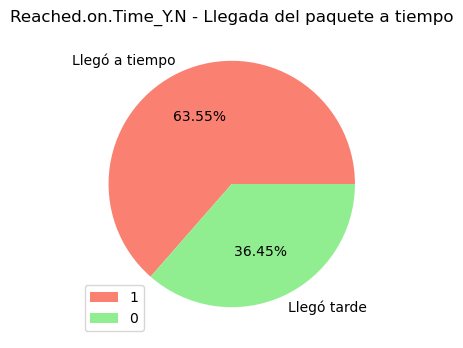

In [13]:
# Graficamos
fig,ax = plt.subplots(figsize=(4,4))
nombres = ["Llegó a tiempo","Llegó tarde"]
colores = ["salmon","lightgreen"]
ax.pie(train["Reached.on.Time_Y.N"].value_counts(),labels= nombres, autopct= "%1.2f%% ", colors= colores)
plt.title("Reached.on.Time_Y.N - Llegada del paquete a tiempo")
plt.legend(reacheontime_y_n) # Donde 1 es entregado a tiempo 
plt.show()

In [14]:
gender = train["Gender"].unique()
gender

array(['F', 'M'], dtype=object)

In [15]:
train["Gender"].value_counts(normalize = True) * 100

F    50.45005
M    49.54995
Name: Gender, dtype: float64

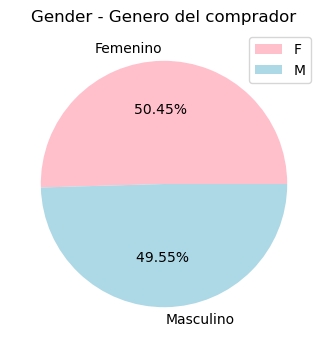

In [16]:
# El porcentaje de compradores femeninos en comparación al masculino esta practicamente equiparado
# Igualmente es una columna que no se tomara en cuenta y no afecta en cuanto al modelo en este caso
fig,ax = plt.subplots(figsize=(4,4))
nombres = ["Femenino","Masculino"]
colores = ["pink","lightblue"]
ax.pie(train["Gender"].value_counts(),labels= nombres, autopct= "%1.2f%% ", colors= colores)
plt.title("Gender - Genero del comprador")
plt.legend(gender)
plt.show()

In [17]:
mode_of_shipment = train["Mode_of_Shipment"].unique()
mode_of_shipment 

array(['Flight', 'Ship', 'Road'], dtype=object)

In [18]:
train["Mode_of_Shipment"].value_counts(normalize = True) * 100

Ship      68.029781
Flight    16.079564
Road      15.890655
Name: Mode_of_Shipment, dtype: float64

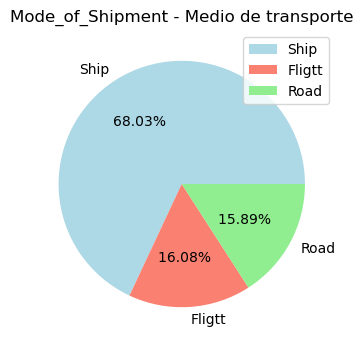

In [19]:
# El medio de transporte mas utilizado fue via embarcaciones
fig,ax = plt.subplots(figsize=(4,4))
nombres = ["Ship","Fligtt", "Road"]
colores = ["lightblue","salmon","lightgreen"]
ax.pie(train["Mode_of_Shipment"].value_counts(),labels= nombres, autopct= "%1.2f%% ", colors= colores)
plt.title("Mode_of_Shipment - Medio de transporte")
plt.legend()
plt.show()

In [20]:
Product_importance = train["Product_importance"].unique()
Product_importance

array(['low', 'medium', 'high'], dtype=object)

In [21]:
train["Product_importance"].value_counts(normalize = True) * 100

low       47.871986
medium    42.871430
high       9.256584
Name: Product_importance, dtype: float64

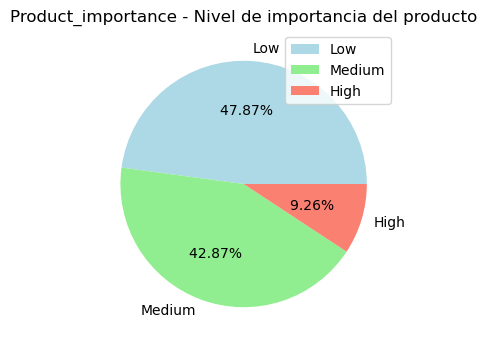

In [22]:
fig,ax = plt.subplots(figsize=(4,4))
nombres = ["Low","Medium", "High"]
colores = ["lightblue","lightgreen","salmon"]
ax.pie(train["Product_importance"].value_counts(),labels= nombres, autopct= "%1.2f%% ", colors= colores)
plt.title("Product_importance - Nivel de importancia del producto")
plt.legend()
plt.show()

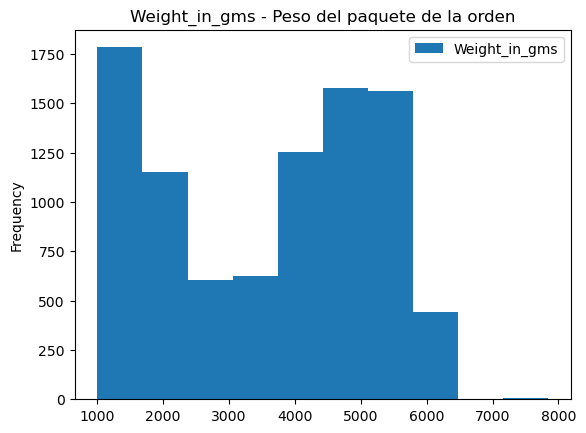

In [23]:
train['Weight_in_gms'].plot.hist()
plt.title("Weight_in_gms - Peso del paquete de la orden")
plt.legend()
# En el histograma de peso de los paquetes se muestra una pequeña concentraciòn entre los 7000 y 8000 mg por lo que se tendra en cuenta para detectar outlier

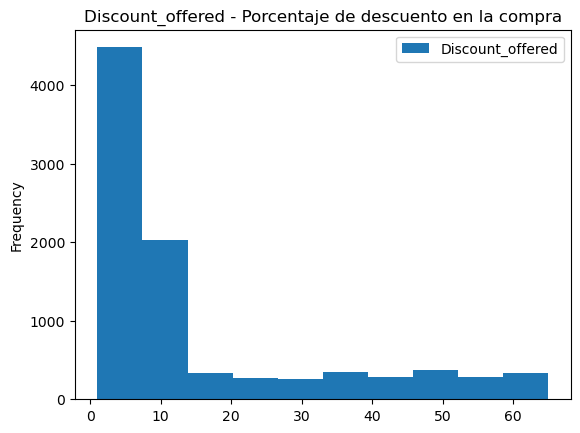

In [24]:
train["Discount_offered"].plot.hist()
plt.title("Discount_offered - Porcentaje de descuento en la compra")
plt.legend()

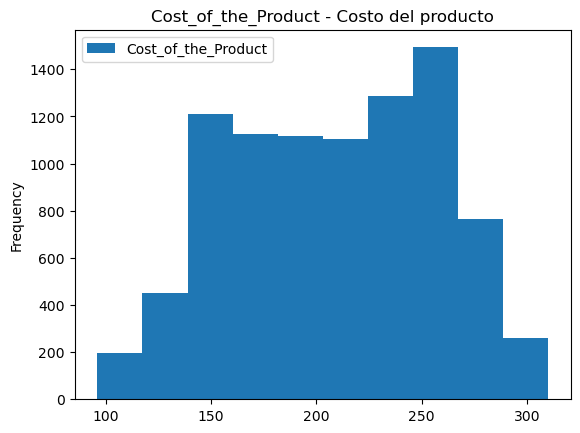

In [25]:
train["Cost_of_the_Product"].plot.hist()
plt.title("Cost_of_the_Product - Costo del producto")
plt.legend()

<font color='lightblue'>**Análisis multidimensional de variables**

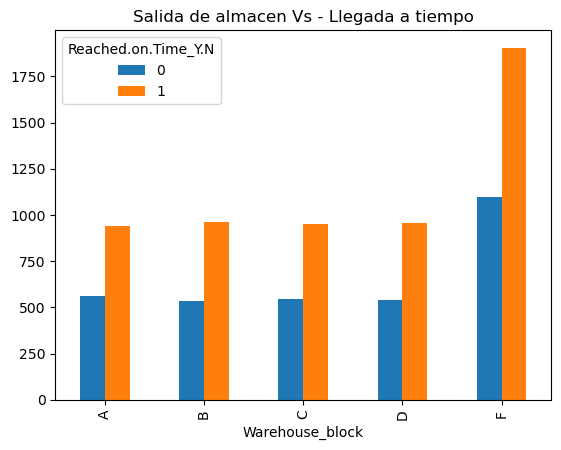

In [26]:
# Relación con el Bloque de Almacen y el tiempo de entrega
Warehouse = train.groupby(['Reached.on.Time_Y.N', 'Warehouse_block']).count()['ID']
Warehouse.unstack(level=0).plot.bar() 
plt.title("Salida de almacen Vs - Llegada a tiempo")
plt.show()


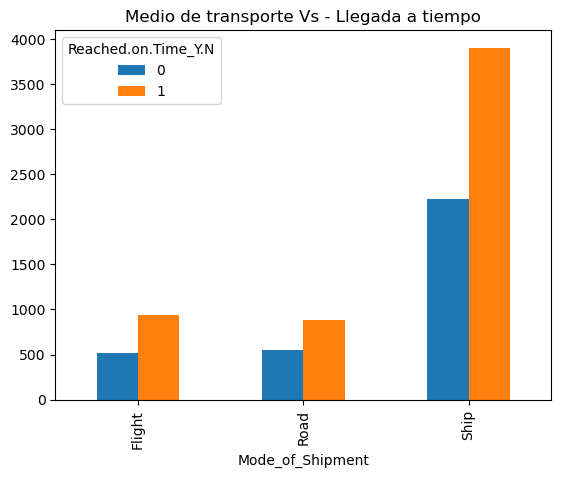

In [27]:
# Vemos si hay alguna relación en cuanto al tipo de entrega.
mode_shipment = train.groupby(['Reached.on.Time_Y.N', 'Mode_of_Shipment']).count()['ID']
mode_shipment.unstack(level=0).plot.bar()
plt.title("Medio de transporte Vs - Llegada a tiempo")
plt.show()


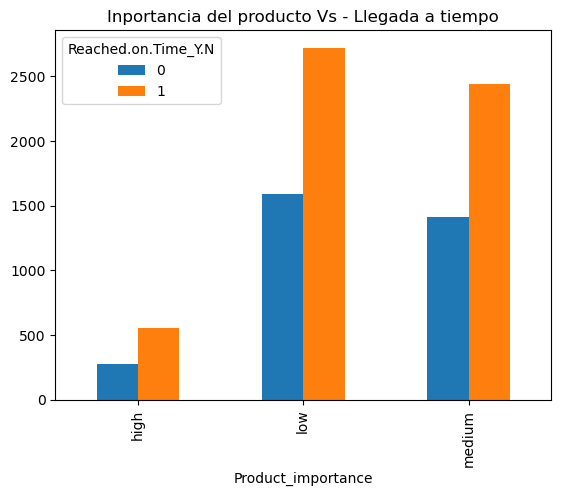

In [28]:
# Verificamos si hay alguna relación en cuanto al tipo de entrega.
Product_importance = train.groupby(['Reached.on.Time_Y.N', 'Product_importance']).count()['ID']
Product_importance.unstack(level=0).plot.bar()
plt.title("Inportancia del producto Vs - Llegada a tiempo")
plt.show()

### <font color="lightblue">***2. Preprocesamiento de datos***

<font color='lightblue'>**Vemos si hay valores faltantes o si existen duplicados**

In [29]:
train[train.duplicated()]
# No hay valores duplicados

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [30]:
train.isnull().sum()
# No hay valores nulos

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<font color='lightblue'>**Analizamos si hay valores atípicos (Outliers o Valores extremos)**

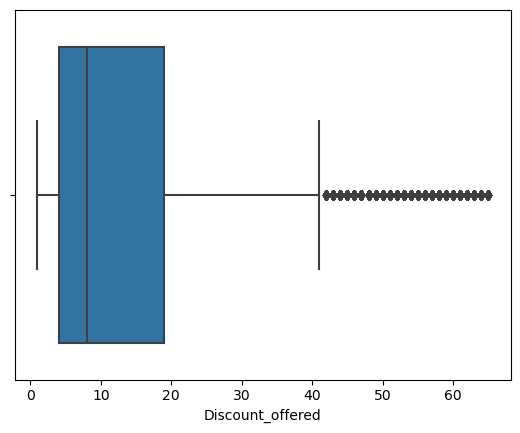

In [31]:
sns.boxplot(x = 'Discount_offered', data = train)
plt.show()

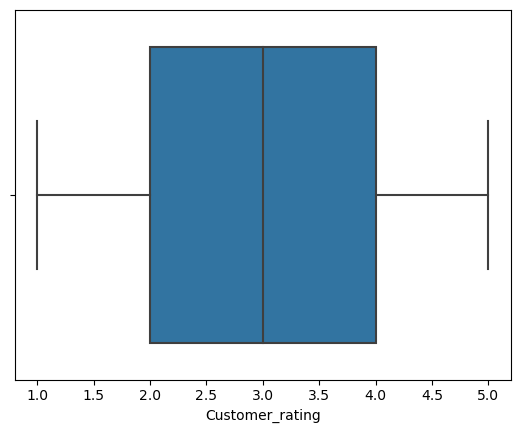

In [32]:
sns.boxplot(x = 'Customer_rating', data = train)
plt.show()

<font color='lightblue'>**Codificación de variables categoricas**

In [33]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['Product_importance'] = label_encoder.fit_transform(train['Product_importance'])
train['Warehouse_block'] = label_encoder.fit_transform(train['Warehouse_block'])
train['Mode_of_Shipment'] = label_encoder.fit_transform(train['Mode_of_Shipment'])

In [34]:
train.info()
# Ya tenemos todas los datos codificados a valores númericos, (Menos gender que sera eliminada)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   int32 
 2   Mode_of_Shipment     8999 non-null   int32 
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   int32 
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int32(3), int64(8), object(1)
memory usage: 738.3+ KB


<font color='lightblue'>**Ingenieria de featuares**

In [35]:
# No hizo falta crear nuevas columnas de acuerdo a los datos

### <font color="lightblue">***3. Modelo y conclusión***

<AxesSubplot:>

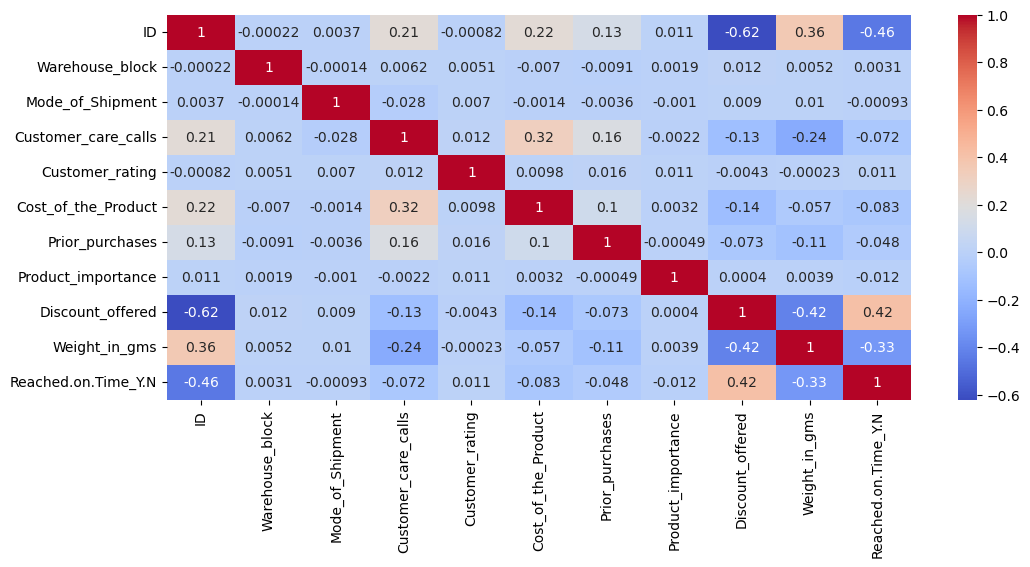

In [36]:
# Vemos la correlación que existe entre las variables viendo la matriz
plt.figure(figsize=(12,5))
sns.heatmap(train.corr(), cmap='coolwarm',annot=True)

In [37]:
train['Product_importance'].value_counts() # Segun la matriz podemos ver que la columna prior que le hicimos onehotencoder

1    4308
2    3858
0     833
Name: Product_importance, dtype: int64

In [38]:
# Trabajaremos con las siguientes columnas
train_final = train[[ "Customer_rating","Product_importance", "Discount_offered", "Reached.on.Time_Y.N"]]
train_final.head()

,Customer_rating,Product_importance,Discount_offered,Reached.on.Time_Y.N
0,2,1,44,1
1,5,1,59,1
2,2,1,48,1
3,3,2,10,1
4,2,2,46,1


<font color='lightblue'>**Importamos librerias necesarias para el modelo**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [40]:
scal = StandardScaler()
train = scal.fit_transform(train_final)

In [41]:
# Dividimos nuestros datos en train y test
X = train_final.drop(["Reached.on.Time_Y.N"], axis=1)
y = train_final["Reached.on.Time_Y.N"]

In [42]:
X

,Customer_rating,Product_importance,Discount_offered
0,2,1,44
1,5,1,59
2,2,1,48
3,3,2,10
4,2,2,46
...,...,...,...
8994,1,1,1
8995,3,2,3
8996,5,2,6
8997,2,2,5


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 42)

In [44]:
from sklearn.linear_model import LogisticRegression
clasif_RL = LogisticRegression(random_state = 42)
#Entrenamos el modelo
clasif_RL.fit(X_train, y_train)

LogisticRegression(random_state=42)

<font color='lightblue'>**Evaluamos el modelo**

In [45]:
y_pred  = clasif_RL.predict(X_test)

In [46]:
# Matriz de confusion
matriz = confusion_matrix(y_test,y_pred)
matriz

array([[ 376,  409],
       [ 415, 1050]], dtype=int64)

In [47]:
# Accuracy
exactitud = accuracy_score(y_test,y_pred)
exactitud

0.6337777777777778

In [48]:
# Recall
precision = recall_score(y_test,y_pred)
precision

0.7167235494880546

<font color='lightblue'>**Evaluamos ahora con el archivo provisto como test**

In [49]:
# Subimos el datset provisto como test para realizar pruebas
test = pd.read_excel("E-Commerce_test.xlsx")

In [50]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

test['Product_importance'] = label_encoder.fit_transform(test['Product_importance'])
test['Warehouse_block'] = label_encoder.fit_transform(test['Warehouse_block'])
test['Mode_of_Shipment'] = label_encoder.fit_transform(test['Mode_of_Shipment'])

In [51]:
#Usamos estas columnas
test1 = test[[ "Customer_rating","Product_importance", "Discount_offered",]]
test1.head()

,Customer_rating,Product_importance,Discount_offered
0,1,2,10
1,3,0,9
2,3,1,3
3,1,2,1
4,2,1,4


In [52]:
test1.shape

(2000, 3)

In [53]:
y_pred2 =clasif_RL.predict(test1)
print(y_pred2 .shape)
print(y_pred2)

(2000,)
[1 1 0 ... 0 0 1]


<font color='lightblue'>**Importamos el resultado final**

In [54]:
#Recall
resultado = pd.DataFrame(y_pred2,columns=['pred'])
resultado.to_csv("gus86gjb.csv", index = False)

In [55]:
resultado

,pred
0,1
1,1
2,0
3,0
4,0
...,...
1995,0
1996,1
1997,0
1998,0


In [56]:
resultado['pred'].value_counts()

1    1031
0     969
Name: pred, dtype: int64